In [56]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import MinMaxScaler
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv('timeseries.csv')


In [4]:
df = df.dropna(subset=['time']) 
df.tail(20)
df = df[:96431:]
# df['time'][78886]
df.index = pd.to_datetime(df['time'], format='%Y%m%d:%H%M')
df =  df.drop(["time","H_sun","T2m","WS10m","Int"], axis = 1)
df

,G(i)
time,
2010-01-01 00:07:00,0
2010-01-01 01:07:00,0
2010-01-01 02:07:00,0
2010-01-01 03:07:00,0
2010-01-01 04:07:00,91.98
...,...
2020-12-31 18:07:00,0
2020-12-31 19:07:00,0
2020-12-31 20:07:00,0


In [5]:
df["Seconds"] = df.index.map(pd.Timestamp.timestamp)
df

,G(i),Seconds
time,,
2010-01-01 00:07:00,0,1.262304e+09
2010-01-01 01:07:00,0,1.262308e+09
2010-01-01 02:07:00,0,1.262312e+09
2010-01-01 03:07:00,0,1.262315e+09
2010-01-01 04:07:00,91.98,1.262319e+09
...,...,...
2020-12-31 18:07:00,0,1.609438e+09
2020-12-31 19:07:00,0,1.609442e+09
2020-12-31 20:07:00,0,1.609445e+09


In [6]:
day  = 60 * 60 * 24
year =  365.2425 * day
month = 30 * day

df ["day sin"] = np.sin(df['Seconds'] * ( 2 * np.pi /day))
df ["day cos"] = np.cos(df['Seconds'] * ( 2 * np.pi /day))
# df ["year sin"] = np.sin(df['Seconds'] * ( 2 * np.pi /year))
# df ["year cos"] = np.cos(df['Seconds'] * ( 2 * np.pi /year))
df
  

,G(i),Seconds,day sin,day cos
time,,,,
2010-01-01 00:07:00,0,1.262304e+09,0.030539,0.999534
2010-01-01 01:07:00,0,1.262308e+09,0.288196,0.957571
2010-01-01 02:07:00,0,1.262312e+09,0.526214,0.850352
2010-01-01 03:07:00,0,1.262315e+09,0.728371,0.685183
2010-01-01 04:07:00,91.98,1.262319e+09,0.880891,0.473320
...,...,...,...,...
2020-12-31 18:07:00,0,1.609438e+09,-0.999534,0.030539
2020-12-31 19:07:00,0,1.609442e+09,-0.957571,0.288196
2020-12-31 20:07:00,0,1.609445e+09,-0.850352,0.526214


In [7]:
df = df.drop(["Seconds"], axis = 1)
df.head(20)

,G(i),day sin,day cos
time,,,
2010-01-01 00:07:00,0,0.030539,0.999534
2010-01-01 01:07:00,0,0.288196,0.957571
2010-01-01 02:07:00,0,0.526214,0.850352
2010-01-01 03:07:00,0,0.728371,0.685183
2010-01-01 04:07:00,91.98,0.880891,0.473320
2010-01-01 05:07:00,432.28,0.973379,0.229200
2010-01-01 06:07:00,681.34,0.999534,-0.030539
2010-01-01 07:07:00,867.69,0.957571,-0.288196
2010-01-01 08:07:00,987.62,0.850352,-0.526214


In [8]:
df = df[:96431:]
df_multi = df.iloc[:,0:5] # removing the time column 
df.tail(30)
print(df_multi.head(10))
print(df_multi.dtypes)
# y = [x for x in df['Int'] if x == 0.0]
# print(y)b
# type(df_multi)


                        G(i)   day sin   day cos
time                                            
2010-01-01 00:07:00        0  0.030539  0.999534
2010-01-01 01:07:00        0  0.288196  0.957571
2010-01-01 02:07:00        0  0.526214  0.850352
2010-01-01 03:07:00        0  0.728371  0.685183
2010-01-01 04:07:00    91.98  0.880891  0.473320
2010-01-01 05:07:00   432.28  0.973379  0.229200
2010-01-01 06:07:00   681.34  0.999534 -0.030539
2010-01-01 07:07:00   867.69  0.957571 -0.288196
2010-01-01 08:07:00   987.62  0.850352 -0.526214
2010-01-01 09:07:00  1034.38  0.685183 -0.728371
G(i)        object
day sin    float64
day cos    float64
dtype: object


In [13]:

df_multi['G(i)'] = pd.to_numeric(df_multi['G(i)'], errors='coerce')
unique_types = df_multi['G(i)'].apply(type).unique()

print(unique_types)

[<class 'float'>]


In [14]:

df_scaled = df_multi.to_numpy()


In [15]:

print(df_scaled[0:5,:]) # this it the input
print(df_scaled[5,:]) # this is the output

[[0.00000000e+00 3.05385132e-02 9.99533591e-01]
 [0.00000000e+00 2.88196268e-01 9.57571361e-01]
 [0.00000000e+00 5.26213924e-01 8.50352225e-01]
 [0.00000000e+00 7.28370970e-01 6.85182990e-01]
 [9.19800000e+01 8.80890738e-01 4.73319667e-01]]
[4.32280000e+02 9.73379258e-01 2.29200391e-01]


In [16]:
def df_to_X_y(df_as_np, window_size=5):
#   df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [a for a in df_as_np[i:i+window_size,:]]
    X.append(row)
    label = df_as_np[i+window_size,0]
    y.append(label)
  return np.array(X), np.array(y)

In [26]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(df_scaled, WINDOW_SIZE)
print(X1[1])
print("slfejlksdjlfkjdslkjfjlk")
print(y1[0])
X1.shape, y1.shape

[[ 0.00000000e+00  2.88196268e-01  9.57571361e-01]
 [ 0.00000000e+00  5.26213924e-01  8.50352225e-01]
 [ 0.00000000e+00  7.28370970e-01  6.85182990e-01]
 [ 9.19800000e+01  8.80890738e-01  4.73319667e-01]
 [ 4.32280000e+02  9.73379258e-01  2.29200391e-01]
 [ 6.81340000e+02  9.99533591e-01 -3.05385132e-02]
 [ 8.67690000e+02  9.57571361e-01 -2.88196268e-01]
 [ 9.87620000e+02  8.50352225e-01 -5.26213924e-01]
 [ 1.03438000e+03  6.85182990e-01 -7.28370970e-01]
 [ 9.98940000e+02  4.73319667e-01 -8.80890738e-01]
 [ 8.87090000e+02  2.29200391e-01 -9.73379258e-01]
 [ 7.02600000e+02 -3.05385132e-02 -9.99533591e-01]]
slfejlksdjlfkjdslkjfjlk
702.6


((96419, 12, 3), (96419,))

In [23]:
X_train1, y_train1 = X1[:61367], y1[:61367]
X_val1, y_val1 = X1[61367:70127], y1[61367:70127] # 1 year for validation [61,367 , 70127]
X_test1, y_test1 = X1[70128:], y1[70128:] #  1 year testing [70,128 , 78887]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape


((61367, 12, 3), (61367,), (8760, 12, 3), (8760,), (26291, 12, 3), (26291,))

In [33]:
X_train1[:,:,:][0][5]

array([4.32280000e+02, 9.73379258e-01, 2.29200391e-01])

In [25]:
print(np.mean(X_train1[:,:,0]))
np.std((X_train1[:,:,0]))
#  91.98, => -0.48
# 432.28 =>0.44

268.6440943829745


367.66099024906316

In [37]:
g_training_mean = np.mean( X_train1[ : ,: ,0])
g_training_std = np.std( X_train1[ : ,: ,0])
def preprocess(X):
    X[:,:,0] = (X[:,:,0] - g_training_mean)/ g_training_std
    return X


In [38]:
preprocess(X_train1)
preprocess(X_val1)
preprocess(X_test1)


array([[[-0.73068425,  0.03053851,  0.99953359],
        [-0.73068425,  0.28819627,  0.95757136],
        [-0.73068425,  0.52621392,  0.85035222],
        ...,
        [ 2.13864382,  0.68518299, -0.72837097],
        [ 2.02500653,  0.47331967, -0.88089074],
        [ 1.74638029,  0.22920039, -0.97337926]],

       [[-0.73068425,  0.28819627,  0.95757136],
        [-0.73068425,  0.52621392,  0.85035222],
        [-0.73068425,  0.72837097,  0.68518299],
        ...,
        [ 2.02500653,  0.47331967, -0.88089074],
        [ 1.74638029,  0.22920039, -0.97337926],
        [ 1.12091279, -0.03053851, -0.99953359]],

       [[-0.73068425,  0.52621392,  0.85035222],
        [-0.73068425,  0.72837097,  0.68518299],
        [-0.6581174 ,  0.88089074,  0.47331967],
        ...,
        [ 1.74638029,  0.22920039, -0.97337926],
        [ 1.12091279, -0.03053851, -0.99953359],
        [ 0.6588839 , -0.28819627, -0.95757136]],

       ...,

       [[ 1.99351012,  0.85035223, -0.52621392],
        [ 2

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 3)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                17408     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,937
Trainable params: 17,937
Non-trainable params: 0
_________________________________________________________________


In [40]:
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=10, verbose=1, mode='min')

In [42]:
cp1 = ModelCheckpoint('model_G(I)_TIME/', save_best_only=True)
# metrics , learning rate, loss  can be changed 
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [43]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=50, callbacks=[cp1,early_stopping])

Epoch 1/50
1918/1918 [==============================] - ETA: 0s - loss: 64601.8750 - root_mean_squared_error: 254.1690

INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


1918/1918 [==============================] - 22s 10ms/step - loss: 64601.8750 - root_mean_squared_error: 254.1690 - val_loss: 14773.4541 - val_root_mean_squared_error: 121.5461
Epoch 2/50
1917/1918 [============================>.] - ETA: 0s - loss: 10185.0107 - root_mean_squared_error: 100.9208

INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


1918/1918 [==============================] - 20s 10ms/step - loss: 10181.6787 - root_mean_squared_error: 100.9043 - val_loss: 8987.5850 - val_root_mean_squared_error: 94.8029
Epoch 3/50
1918/1918 [==============================] - ETA: 0s - loss: 7452.8535 - root_mean_squared_error: 86.3299

INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


1918/1918 [==============================] - 21s 11ms/step - loss: 7452.8535 - root_mean_squared_error: 86.3299 - val_loss: 8020.3276 - val_root_mean_squared_error: 89.5563
Epoch 4/50
1915/1918 [============================>.] - ETA: 0s - loss: 6945.4751 - root_mean_squared_error: 83.3395

INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


1918/1918 [==============================] - 22s 11ms/step - loss: 6946.4580 - root_mean_squared_error: 83.3454 - val_loss: 7874.5381 - val_root_mean_squared_error: 88.7386
Epoch 5/50
1912/1918 [============================>.] - ETA: 0s - loss: 6793.9541 - root_mean_squared_error: 82.4254

INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


1918/1918 [==============================] - 22s 11ms/step - loss: 6804.8960 - root_mean_squared_error: 82.4918 - val_loss: 7558.6255 - val_root_mean_squared_error: 86.9404
Epoch 6/50
1918/1918 [==============================] - 13s 7ms/step - loss: 6689.4663 - root_mean_squared_error: 81.7892 - val_loss: 7580.7373 - val_root_mean_squared_error: 87.0674
Epoch 7/50
1918/1918 [==============================] - 14s 7ms/step - loss: 6675.6274 - root_mean_squared_error: 81.7045 - val_loss: 7611.4751 - val_root_mean_squared_error: 87.2438
Epoch 8/50
1918/1918 [==============================] - 14s 7ms/step - loss: 6619.4697 - root_mean_squared_error: 81.3601 - val_loss: 7565.7959 - val_root_mean_squared_error: 86.9816
Epoch 9/50
1913/1918 [============================>.] - ETA: 0s - loss: 6600.0117 - root_mean_squared_error: 81.2405

INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


1918/1918 [==============================] - 23s 12ms/step - loss: 6593.9580 - root_mean_squared_error: 81.2032 - val_loss: 7467.6860 - val_root_mean_squared_error: 86.4158
Epoch 10/50
1915/1918 [============================>.] - ETA: 0s - loss: 6561.2954 - root_mean_squared_error: 81.0018

INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


1918/1918 [==============================] - 24s 13ms/step - loss: 6561.1533 - root_mean_squared_error: 81.0009 - val_loss: 7423.3130 - val_root_mean_squared_error: 86.1587
Epoch 11/50
1918/1918 [==============================] - 17s 9ms/step - loss: 6537.0415 - root_mean_squared_error: 80.8520 - val_loss: 7423.3179 - val_root_mean_squared_error: 86.1587
Epoch 12/50
1918/1918 [==============================] - 18s 9ms/step - loss: 6503.7114 - root_mean_squared_error: 80.6456 - val_loss: 7458.5469 - val_root_mean_squared_error: 86.3629
Epoch 13/50
1912/1918 [============================>.] - ETA: 0s - loss: 6486.4658 - root_mean_squared_error: 80.5386

INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


1918/1918 [==============================] - 26s 13ms/step - loss: 6505.8267 - root_mean_squared_error: 80.6587 - val_loss: 7400.4502 - val_root_mean_squared_error: 86.0259
Epoch 14/50
1914/1918 [============================>.] - ETA: 0s - loss: 6472.7861 - root_mean_squared_error: 80.4536

INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


1918/1918 [==============================] - 25s 13ms/step - loss: 6473.6421 - root_mean_squared_error: 80.4589 - val_loss: 7379.4536 - val_root_mean_squared_error: 85.9037
Epoch 15/50
1913/1918 [============================>.] - ETA: 0s - loss: 6462.0649 - root_mean_squared_error: 80.3870

INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


1918/1918 [==============================] - 28s 14ms/step - loss: 6459.7720 - root_mean_squared_error: 80.3727 - val_loss: 7344.7573 - val_root_mean_squared_error: 85.7016
Epoch 16/50
1918/1918 [==============================] - 19s 10ms/step - loss: 6467.7373 - root_mean_squared_error: 80.4222 - val_loss: 7363.2041 - val_root_mean_squared_error: 85.8091
Epoch 17/50
1918/1918 [==============================] - 18s 10ms/step - loss: 6436.7983 - root_mean_squared_error: 80.2297 - val_loss: 7452.6104 - val_root_mean_squared_error: 86.3285
Epoch 18/50
1918/1918 [==============================] - 19s 10ms/step - loss: 6438.1948 - root_mean_squared_error: 80.2384 - val_loss: 7364.1763 - val_root_mean_squared_error: 85.8148
Epoch 19/50
1918/1918 [==============================] - 19s 10ms/step - loss: 6425.0869 - root_mean_squared_error: 80.1566 - val_loss: 7501.4097 - val_root_mean_squared_error: 86.6107
Epoch 20/50
1918/1918 [==============================] - 19s 10ms/step - loss: 6420.745

INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


1918/1918 [==============================] - 30s 16ms/step - loss: 6406.1602 - root_mean_squared_error: 80.0385 - val_loss: 7330.5093 - val_root_mean_squared_error: 85.6184
Epoch 23/50
1915/1918 [============================>.] - ETA: 0s - loss: 6376.5103 - root_mean_squared_error: 79.8531

INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


1918/1918 [==============================] - 30s 16ms/step - loss: 6374.3838 - root_mean_squared_error: 79.8397 - val_loss: 7330.3867 - val_root_mean_squared_error: 85.6177
Epoch 24/50
1918/1918 [==============================] - 22s 12ms/step - loss: 6372.7720 - root_mean_squared_error: 79.8296 - val_loss: 7401.4834 - val_root_mean_squared_error: 86.0319
Epoch 25/50
1918/1918 [==============================] - 22s 12ms/step - loss: 6375.6191 - root_mean_squared_error: 79.8475 - val_loss: 7355.5513 - val_root_mean_squared_error: 85.7645
Epoch 26/50
1916/1918 [============================>.] - ETA: 0s - loss: 6363.4624 - root_mean_squared_error: 79.7713

INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


1918/1918 [==============================] - 30s 16ms/step - loss: 6362.6489 - root_mean_squared_error: 79.7662 - val_loss: 7294.3887 - val_root_mean_squared_error: 85.4072
Epoch 27/50
1918/1918 [==============================] - 22s 11ms/step - loss: 6360.3022 - root_mean_squared_error: 79.7515 - val_loss: 7409.2979 - val_root_mean_squared_error: 86.0773
Epoch 28/50
1918/1918 [==============================] - 23s 12ms/step - loss: 6350.3838 - root_mean_squared_error: 79.6893 - val_loss: 7309.6138 - val_root_mean_squared_error: 85.4963
Epoch 29/50
1918/1918 [==============================] - 23s 12ms/step - loss: 6353.5854 - root_mean_squared_error: 79.7094 - val_loss: 7314.9058 - val_root_mean_squared_error: 85.5272
Epoch 30/50
1918/1918 [==============================] - 23s 12ms/step - loss: 6335.1997 - root_mean_squared_error: 79.5940 - val_loss: 7295.9390 - val_root_mean_squared_error: 85.4163
Epoch 31/50
1918/1918 [==============================] - 22s 12ms/step - loss: 6310.386

In [45]:
from tensorflow.keras.models import load_model
model1 = load_model('model_G(I)_TIME/')

In [46]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1.flatten()})
train_results.head(30)

1918/1918 [==============================] - 7s 3ms/step


,Train Predictions,Actuals
0,668.383240,702.60
1,456.643066,472.43
2,208.158279,208.97
3,11.930079,0.00
4,0.306529,0.00
5,0.235225,0.00
6,0.185975,0.00
7,0.147637,0.00
8,0.088069,0.00
9,0.024948,0.00


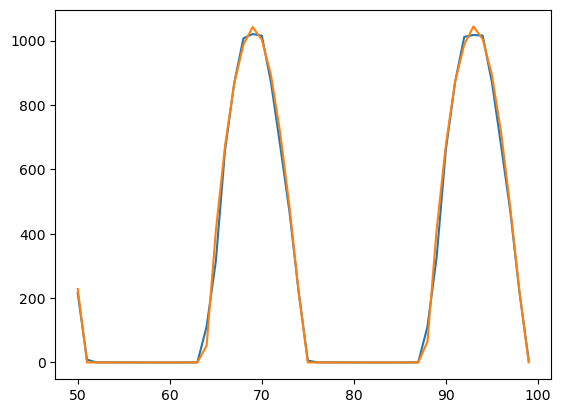

In [47]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [48]:

val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1.flatten()})
val_results.head(20)

274/274 [==============================] - 1s 3ms/step


,Val Predictions,Actuals
0,907.285828,915.12
1,693.185486,731.26
2,482.781799,491.41
3,218.373962,224.16
4,16.355951,0.00
5,0.259330,0.00
6,0.218103,0.00
7,0.176310,0.00
8,0.147037,0.00
9,0.091007,0.00


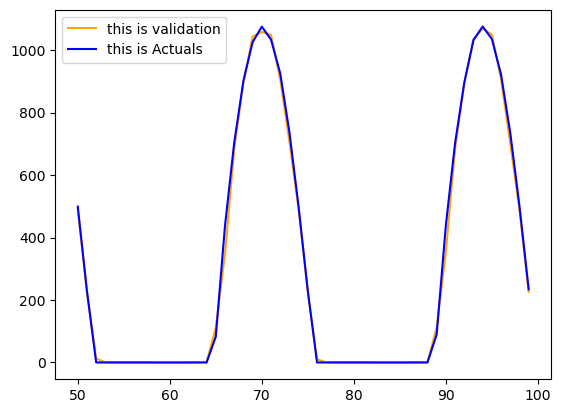

In [52]:
plt.plot(val_results['Val Predictions'][50:100],label="this is validation",color="Orange")
plt.plot(val_results['Actuals'][50:100],label="this is Actuals",color="Blue")
plt.legend()

In [53]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1.flatten()})
test_results

822/822 [==============================] - 2s 3ms/step


,Test Predictions,Actuals
0,694.877747,680.76
1,452.690186,510.89
2,229.807831,236.66
3,5.754004,0.00
4,0.268559,0.00
...,...,...
26286,0.183076,0.00
26287,0.147754,0.00
26288,0.089707,0.00
26289,0.027047,0.00


In [54]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=50, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions': predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(predictions, y)

822/822 [==============================] - 2s 3ms/step


(       Predictions  Actuals
 0       694.877747   680.76
 1       452.690186   510.89
 2       229.807831   236.66
 3         5.754004     0.00
 4         0.268559     0.00
 ...            ...      ...
 26286     0.183076     0.00
 26287     0.147754     0.00
 26288     0.089707     0.00
 26289     0.027047     0.00
 26290    -0.021463     0.00
 
 [26291 rows x 2 columns],
 5665.363914142274)

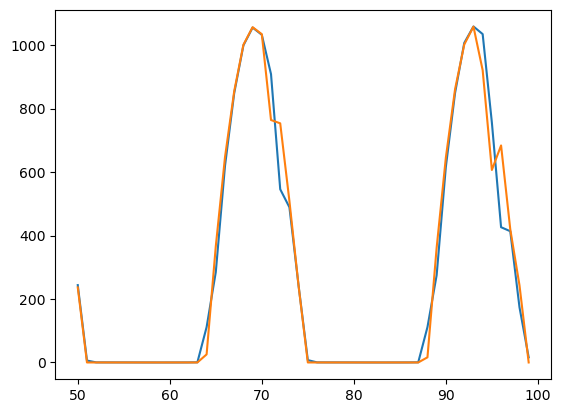

In [55]:
plot_predictions1(model1, X_test1, y_test1.flatten())

In [123]:
df_multi.iloc[78889:78920,:]

,G(i),day sin,day cos
time,,,
2019-01-01 01:07:00,-0.732689,0.288196,0.957571
2019-01-01 02:07:00,0.000000,0.526214,0.850352
2019-01-01 03:07:00,0.000000,0.728371,0.685183
2019-01-01 04:07:00,46.980000,0.880891,0.473320
2019-01-01 05:07:00,449.760000,0.973379,0.229200
2019-01-01 06:07:00,707.260000,0.999534,-0.030539
2019-01-01 07:07:00,902.770000,0.957571,-0.288196
2019-01-01 08:07:00,1024.410000,0.850352,-0.526214
2019-01-01 09:07:00,1072.310000,0.685183,-0.728371


In [130]:
kkk = df_multi.iloc[78885:78890,:]
time = str(df_multi.index[78889])
print(time)
print(type(kkk))
print(kkk.shape)
reshaped_array = np.reshape(kkk.to_numpy(), (1, 5, 3))
preprocess(reshaped_array)
print(reshaped_array)
predictions = model1.predict(reshaped_array)
print(predictions[0][0])

# original= scaler.inverse_transform(predictions)
# print(original)
# predictions
# inverse_data = np.zeros((len(predictions), scaler.shape[1]))

2019-01-01 01:07:00
<class 'pandas.core.frame.DataFrame'>
(5, 3)
[[[-0.73268918 -0.68518299  0.72837097]
  [-0.73268918 -0.47331967  0.88089074]
  [-0.73268918 -0.22920039  0.97337926]
  [-0.73268918  0.03053851  0.99953359]
  [-0.73268918  0.28819627  0.95757136]]]
1/1 [==============================] - 0s 19ms/step
0.0243299


In [125]:
from datetime import datetime, timedelta

def get_next_24_hours_from_datetime(start_datetime_str):
    """
    Generate a list of strings representing the datetime for the next 24 hours,
    given the start datetime in the format "YYYY-MM-DD HH:MM:SS".

    Parameters:
    - start_datetime_str (str): The starting datetime in the format "YYYY-MM-DD HH:MM:SS".

    Returns:
    - list of strings: Each string contains the datetime for the next 24 hours in the format "YYYY-MM-DD HH:MM:SS".
    """
    # Convert the input string to a datetime object
    start_datetime = datetime.strptime(start_datetime_str, "%Y-%m-%d %H:%M:%S")

    # Initialize a list to hold the future datetimes in the desired format
    future_datetimes_formatted = []
    day_sin= []
    day_cos= []

    # Calculate and format the next 24 hours
    for i in range(2, 26):  # Start from 1 to include the next hour immediately
        future_datetime = start_datetime + timedelta(hours=i)
        timeStamp = future_datetime.timestamp()
        day_sin_ = np.sin(timeStamp * ( 2 * np.pi /day))
        day_cos_ = np.cos(timeStamp * ( 2 * np.pi /day))
        day_sin.append(day_sin_)
        day_cos.append(day_cos_)
        
    return day_cos,day_sin


In [133]:
day_cos, day_sin = get_next_24_hours_from_datetime(time)

In [136]:

input = df_scaled[78885:78890,:]  # Initial input extracted from your original scaled DataFrame
output_scaled = []  

for i in range(24):
    # Reshape input for the model prediction
    reshaped_array = np.reshape(input, (1, 5, 3))
    preprocess(reshaped_array)
    prediction = []
    prediction.append( model1.predict(reshaped_array)[0][0])
    prediction.append(day_sin[i])
    prediction.append(day_cos[i])
    
    
    
    # Reshape the prediction to match the input shape if necessary
    # Adjust the reshaping based on the actual shape of your model's output
    prediction_reshaped = np.reshape(prediction, (1, 3))
    input = np.reshape(input, (5, 3))  # Ensure input is in the correct shape before appending
    # Append the new prediction at the end of the input array
    input = np.vstack([input, prediction_reshaped])  # Stack vertically to add as a new row
    
    # Remove the oldest entry to maintain the sliding window of input data
    input = input[1:, :]  # Keep the last 5 entries, including the newly added prediction
    
    output_scaled.append(prediction[0])


# print(output_scaled)  # Remains empty, uncomment if needed
print(output_scaled)  # Print or process the predictions as 




1/1 [==============================] - 0s 20ms/step
[0.0243299, -0.04566133, 112.74606, 371.20358, 616.1694, 784.54333, 869.8429, 851.312, 698.84296, 542.70715, 363.9002, 220.84758, 125.90215, 17.245089, 0.38434553, -0.01366806, -0.06906903, -0.01503253, 0.006919265, 0.007453561, -0.019474268, -0.02298379, -0.03494966, -0.02510798]


In [137]:
print("this is the real scaled output")
for i in output_scaled:
    print(i)

this is the real scaled output
0.0243299
-0.04566133
112.74606
371.20358
616.1694
784.54333
869.8429
851.312
698.84296
542.70715
363.9002
220.84758
125.90215
17.245089
0.38434553
-0.01366806
-0.06906903
-0.01503253
0.006919265
0.007453561
-0.019474268
-0.02298379
-0.03494966
-0.02510798
